In [1]:
import numpy as np

In [2]:
X = 2 * np.random.rand(100,1)
X

array([[1.76906805],
       [0.52718673],
       [0.53419531],
       [0.38021168],
       [0.59434648],
       [0.27433537],
       [0.94033869],
       [1.77754749],
       [1.58572231],
       [1.94413699],
       [0.70361198],
       [0.35164678],
       [1.90515025],
       [1.07039673],
       [0.03052946],
       [1.10655375],
       [1.10857216],
       [0.78902811],
       [1.35094764],
       [1.4688961 ],
       [1.00696479],
       [0.49392811],
       [1.04703036],
       [0.58821295],
       [1.6044414 ],
       [0.52565377],
       [1.95831754],
       [0.18619182],
       [0.38776288],
       [1.62499137],
       [1.01567739],
       [0.82681801],
       [1.83998605],
       [1.47528211],
       [0.41961822],
       [0.86453898],
       [0.57507335],
       [1.81996278],
       [0.2120667 ],
       [1.7879308 ],
       [1.17298995],
       [0.34579966],
       [1.89117517],
       [1.13532053],
       [1.58967851],
       [1.66785121],
       [1.56842209],
       [0.363

In [3]:
y = 4 + 3 * X + np.random.randn(100,1)
y

array([[ 9.53316962],
       [ 5.87498044],
       [ 6.07151047],
       [ 5.91058032],
       [ 6.86669737],
       [ 4.67989637],
       [ 5.69528994],
       [ 8.85574458],
       [ 7.03852747],
       [ 9.74354962],
       [ 6.05430651],
       [ 4.63827794],
       [ 8.72621708],
       [ 6.42184598],
       [ 4.57985464],
       [ 8.36215486],
       [ 6.61066303],
       [ 5.05893783],
       [ 5.6750127 ],
       [ 8.12448109],
       [ 9.49482131],
       [ 4.23789436],
       [ 6.45559944],
       [ 5.72918121],
       [ 9.00724781],
       [ 5.18504936],
       [10.48424111],
       [ 6.30346797],
       [ 6.51198928],
       [ 7.78689742],
       [ 6.42843634],
       [ 5.60836249],
       [10.16126655],
       [ 7.84957088],
       [ 5.73763115],
       [ 5.1014852 ],
       [ 6.47061736],
       [ 7.43950164],
       [ 4.68627502],
       [10.29499241],
       [ 6.21444887],
       [ 4.02173588],
       [10.76069165],
       [ 6.58660883],
       [ 8.71157001],
       [ 8

In [4]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best
# Considerando que a função era y = 4x + 3+ ruido, aproximação dos parametros foi boa

array([[3.87444528],
       [2.89835031]])

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
X_new_b

array([[1., 0.],
       [1., 2.]])

In [7]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.87444528],
       [9.6711459 ]])

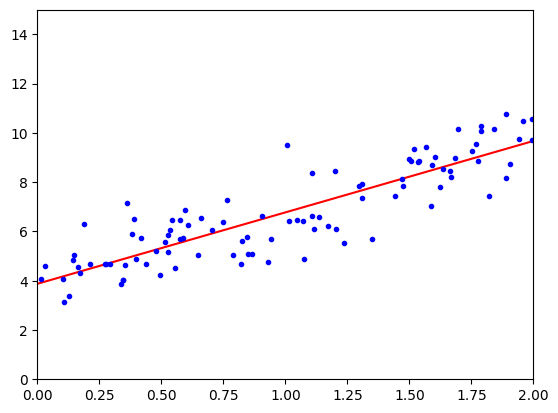

In [8]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-")
plt.plot(X,y, "b.")
plt.axis([0,2,0,15])
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X, y)

LinearRegression()

In [10]:
lin_reg.intercept_, lin_reg.coef_

(array([3.87444528]), array([[2.89835031]]))

In [11]:
lin_reg.predict(X_new)

array([[3.87444528],
       [9.6711459 ]])

In [12]:
theta_best_svd, re, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.87444528],
       [2.89835031]])

In [13]:
np.linalg.pinv(X_b).dot(y)

array([[3.87444528],
       [2.89835031]])

In [14]:
eta = 0.1
n_interacoes = 1000
m = 100

In [15]:
theta = np.random.randn(2,1)
theta

array([[-0.08778593],
       [ 1.14892648]])

In [16]:
for iteration in range(n_interacoes):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [17]:
theta

array([[3.87444528],
       [2.89835031]])

In [18]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [19]:
theta

array([[3.85445846],
       [2.88745897]])

In [20]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [21]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.88751594]), array([2.93494589]))

In [22]:
m = 100 # Numero de instancias

X = 6 * np.random.rand(m, 1) -3
y = 0.5 * X**2 + X + 2 + np.random.rand(m,1)

In [23]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([0.77481226])

In [24]:
X_poly[0]

array([0.77481226, 0.60033404])

In [25]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.52456842]), array([[0.99242213, 0.50017234]]))

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

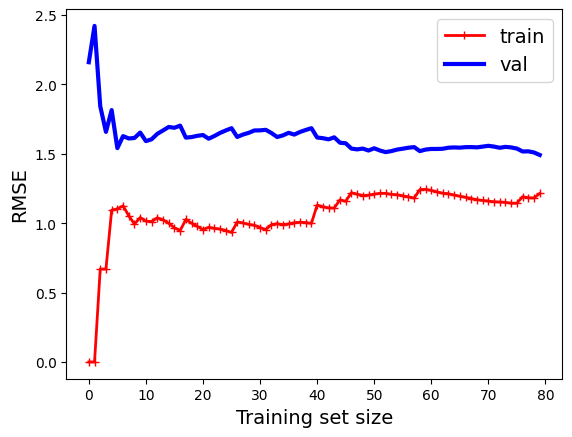

In [27]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

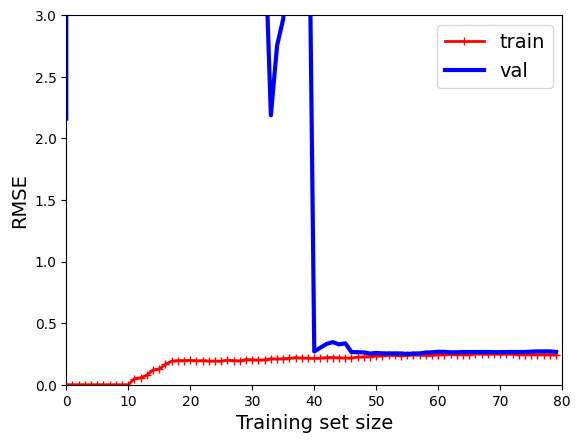

In [28]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])    
plt.show()  

In [29]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([5.23089639])

In [30]:
sgd_reg = SGDRegressor(penalty="l2") # Isso adiciona um termo de regularização a função de custo igual a metade da norma ao quadrado do vetor dos pesos, isso é igual a Regressão de ridge
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.20123467])

In [31]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.17321877])

In [32]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.17619308])

In [33]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [34]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)


# --- 3. Treinamento com Parada Antecipada (Early Stopping) ---
# Criamos o regressor. Os parâmetros são chave para a parada antecipada funcionar:
# max_iter=1: O modelo treina apenas uma "época" por vez dentro do nosso loop.
# warm_start=True: Permite que o treinamento continue de onde parou na chamada anterior de .fit().
# tol=None: Garante que o treino não pare pela sua própria convergência interna.
sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

# Variáveis para guardar o melhor resultado encontrado
minimum_val_error = float("inf")
best_epoch = None
best_model = None

# Loop de treinamento manual, época por época
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # Treina por mais uma época
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    
    # Se o erro de validação desta época for o menor até agora, salvamos o modelo
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg) # `clone` cria uma cópia limpa do melhor modelo


# --- 4. Resultados ---
print("--- Treinamento Concluído ---")
print(f"Melhor época: {best_epoch}")
print(f"Menor erro de validação (MSE): {minimum_val_error:.4f}")
print("\nMelhor modelo salvo na variável 'best_model'")

--- Treinamento Concluído ---
Melhor época: 239
Menor erro de validação (MSE): 1.3513

Melhor modelo salvo na variável 'best_model'


In [35]:
best_model

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=None, warm_start=True)

In [36]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [37]:
X = iris["data"][:,3:]
X

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.1],
       [0.1],
       [0.2],
       [0.4],
       [0.4],
       [0.3],
       [0.3],
       [0.3],
       [0.2],
       [0.4],
       [0.2],
       [0.5],
       [0.2],
       [0.2],
       [0.4],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.1],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.3],
       [0.3],
       [0.2],
       [0.6],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [1.4],
       [1.5],
       [1.5],
       [1.3],
       [1.5],
       [1.3],
       [1.6],
       [1. ],
       [1.3],
       [1.4],
       [1. ],
       [1.5],
       [1. ],
       [1.4],
       [1.3],
       [1.4],
       [1.5],
       [1. ],
       [1.5],
       [1.1],
       [1.8],
      

In [38]:
y = (iris["target"] == 2).astype(int)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [39]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

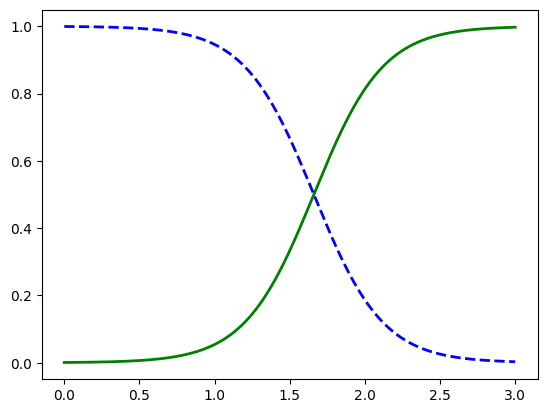

In [40]:
X_new = np.linspace(0, 3, 1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")


In [41]:
log_reg.predict([[1.5], [1.7]])

array([0, 1])

In [42]:
X = iris["data"][:, (2,3)]
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)
X

c:\Users\LIS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [43]:
softmax_reg.predict([[5,2]])

array([2])

In [44]:
softmax_reg.predict_proba([[5,2]])

array([[6.21626372e-07, 5.73689802e-02, 9.42630398e-01]])